In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import our superpowers!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#machine learning tools
#split data to train/test
from sklearn.model_selection import train_test_split 
#model that predicts using many decision trees
from sklearn.ensemble import RandomForestClassifier
#check how good predictions are
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
#make features comparable by scaling


In [4]:
#make plots look nice 
#Makes plots look clean with grid lines
sns.set_style('darkgrid')
#Makes all plots bigger by default
plt.rcParams['figure.figsize']=(10,6)
print("set up completer! ready to predict hits!")

set up completer! ready to predict hits!


In [5]:
#meet your music dataset
#load the spotify music data
df = pd.read_csv("C:/Users/krish/Downloads/Spotify_data.csv")

#first look at our data
print("Dataset Shape: ", df.shape)
print(" \n first 5 songs:")
print(df.head())

Dataset Shape:  (227, 22)
 
 first 5 songs:
   Unnamed: 0                  Track Name  \
0           0                 Not Like Us   
1           1                     Houdini   
2           2  BAND4BAND (feat. Lil Baby)   
3           3          I Don't Wanna Wait   
4           4                       Pedro   

                                   Artists                  Album Name  \
0                           Kendrick Lamar                 Not Like Us   
1                                   Eminem                     Houdini   
2                    Central Cee, Lil Baby  BAND4BAND (feat. Lil Baby)   
3                David Guetta, OneRepublic          I Don't Wanna Wait   
4  Jaxomy, Agatino Romero, Raffaella Carrà                       Pedro   

                 Album ID                Track ID  Popularity Release Date  \
0  5JjnoGJyOxfSZUZtk2rRwZ  6AI3ezQ4o3HUoP6Dhudph3          96   2024-05-04   
1  6Xuu2z00jxRPZei4IJ9neK  2HYFX63wP3otVIvopRS99Z          94   2024-05-31   
2  4Az

In [6]:
#Key Features in Our Data:

#Danceability: How suitable for dancing
#Energy: Intensity and activity
#Tempo: Speed in BPM
#Valence: Musical positiveness
#Loudness: Overall volume
#Popularity: Our TARGET! 🎯


In [7]:
#check for missing data 
print("\n Missing values: ")
print(df.isnull().sum())

#basic statistics
print("\n Data Summary: ")
print(df.describe())


 Missing values: 
Unnamed: 0          0
Track Name          0
Artists             0
Album Name          0
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

 Data Summary: 
       Unnamed: 0  Popularity  Duration (ms)  Danceability      Energy  \
count  227.000000   227.00000     227.000000    227.000000  227.000000   
mean   113.000000    71.85022  219254.881057      0.635639    0.646665   
std     65.673435    10.24110   60483.492317      0.155123    0.159150   
min      0.000000    13.00000   96947.000000      0.271000    0.236000   
25%     56.500000    68.00000  170554.500000      0.552000    0.539500   
50%    113.000000    72

In [8]:
#we need to convert the popularity score into categories
#popularity score ranges from 0-100

def categorize_popularity(Popularity):
    if Popularity >= 75:
        return 'HIT'          #Viral songs     
    else:
        return 'NOT HIT'         #needs work
    


 Song distribution:
Popularity_category
NOT HIT    146
HIT         81
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

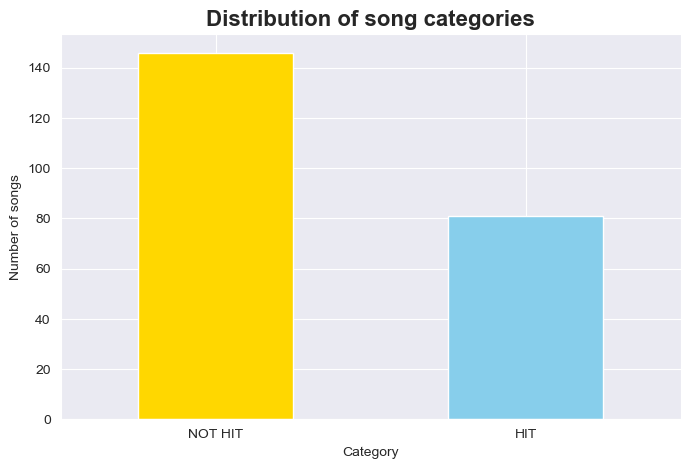

In [9]:
#apply to our dataset
df['Popularity_category'] = df['Popularity'].apply(categorize_popularity)

#see the distribution
print("\n Song distribution:")
print(df['Popularity_category'].value_counts())

#visualise it 
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df['Popularity_category'].value_counts().plot(kind='bar', color=['gold','skyblue','coral'])
plt.title("Distribution of song categories", fontsize=16, fontweight ='bold')
plt.xlabel('Category')
plt.ylabel('Number of songs')
plt.xticks(rotation =0) #works on X-axis tick labels,angle in degrees
plt.show

In [10]:
#FEATURE ENGINEERING(Create super features)
#raw features are good , but combined features are amazing

#1.perceived intensity (energy +loudness)
#High energy + loud = intense song!
df['Intensity'] = df['Energy'] * (df['Loudness']+60)/60 
#Shifts loudness from:
#-60 → 0, 0  → 60
# /60 Scales loudness to 0–1 range
#This keeps loudness comparable to Energy (which is already 0–1)

#2 Dance floor score(danceability +tempo)
#Fast tempo+ danceable =party anthem!
df['dance_floor_score']=df['Danceability'] * (df['Tempo']/120)#120 BPM is a common ideal dance tempo

#3.Mood score(valence+mode)
#positive valence +major key = happy song!
df['mood_score'] = df['Valence'] * (df['Mode']+1)
#This converts:
#Minor (0) → 1,Major (1) → 2
#4. organic sound (acousticness +instrumentalness)
#indicates stripped-dowm, organic tracks
df['organic_sound'] = (df['Acousticness'] + df['Instrumentalness'])/2 #Keeps the result in 0–1 range Treats both features equally

#5 duration category (not too short , not too long)
df['duration_category'] = pd.cut(df['Duration (ms)'],bins=[0,180000,240000,999999],labels=['short','normal','long'])
#
print("New Features Created!")
print("\nFeautre Examples: ")
print(df[['Track Name','Intensity','dance_floor_score','mood_score','organic_sound','duration_category']])

New Features Created!

Feautre Examples: 
                                  Track Name  Intensity  dance_floor_score  \
0                                Not Like Us   0.416925           0.756273   
1                                    Houdini   0.846198           0.990623   
2                 BAND4BAND (feat. Lil Baby)   0.697265           1.029831   
3                         I Don't Wanna Wait   0.659058           0.737614   
4                                      Pedro   0.837814           0.991691   
..                                       ...        ...                ...   
222                               Tu Chahiye   0.671869           0.631237   
223             Aabaad Barbaad (From "Ludo")   0.471044           0.615572   
224                             Jag Ghoomeya   0.490100           0.333367   
225  Tumhe Kitna Pyaar Karte (From "Bawaal")   0.312608           0.510973   
226                                Bekhayali   0.531754           0.415387   

     mood_score  orga

In [11]:
#🧠 Why Feature Engineering Matters:

#Intensity: Humans feel "intensity" as one thing, not separate energy/loudness values

#Dance Floor Score: Fast + danceable = more likely to go viral on TikTok/Reels

#Mood Score: Captures emotional vibe better than raw valence

In [12]:
#get data ready for training
#select features for our model
features = [
    'Danceability','Energy','Loudness','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo','Intensity','dance_floor_score','mood_score','organic_sound'
]

#Prepare X(features) and y(target)
X = df[features]
y = df['Popularity_category']

print("Feature Matrix Shape:",X.shape) #“How much data do I really have?”
print(" Target Distribution:")
print(y.value_counts())#“Am I predicting a rare event?”

#handle missing values 
X = X.fillna(X.mean())

Feature Matrix Shape: (227, 13)
 Target Distribution:
Popularity_category
NOT HIT    146
HIT         81
Name: count, dtype: int64


In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [14]:
#split into training and testing sets
#80% train and 20% test
X_train,X_test,y_train,y_test = train_test_split(
X,y, test_size =0.2, random_state=42, stratify=y
) #Stratify = “Keep the balance same everywhere.”
#smote =SMOTE(random_state=42)

#X_train_balanced, y_train_balanced = smote.fit_resample(X_train,y_train)
print("\n After SMOTE:")
#print(Counter(y_train))
print("\n Data split Complete!")
print(f" Training samples: {len(X_train)}")
print(f" Testing samples: {len(X_test)}")
#print(f"Balanced Training samples: {len(X_train_balanced)}")


 After SMOTE:

 Data split Complete!
 Training samples: 181
 Testing samples: 46


In [15]:
#Scale the Features:
#Different features have different ranges. Tempo is 0-200, but Danceability is 0-1. We need to normalize!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

print("\nFeatures Scaled!")
print("All features now have mean =0 and std 1")



Features Scaled!
All features now have mean =0 and std 1


In [16]:
#now we are gonna train the model
#Random forest  = many decision trees voting together
from sklearn.metrics import accuracy_score
import joblib

model= RandomForestClassifier(
    n_estimators =40,   #100 trees
    max_depth = 5,      # Max tree depth
    min_samples_split=15,#prevent tiny splits
    min_samples_leaf=8, # avoid leaves with very few samples
    max_features ='sqrt',
    class_weight='balanced', #This prevents bias toward the majority class.
    random_state = 42 ,   # for reproducibility
    n_jobs = -1          # use all cpu cores
)

print("Training Random Forest...")
print("This may take a minute...")

#train the model
model.fit(X_train_scaled,y_train)
print("\n Training complete!")
print("\n Making Predictions...")

#make predictions
y_prob = model.predict_proba(X_test_scaled)[:,1] # probability for HIT
y_pred = np.where(y_prob <0.55,'NOT HIT','HIT')


#checking training accuracy
train_score = model.score(X_train_scaled,y_train)
test_score = accuracy_score(y_test,y_pred)

joblib.dump({"model": model, "scaler": scaler}, "music_predictor.pkl")

print("✅ Model and scaler saved together!")
print(f"\n Training Accuracy: {train_score:.2%}")
print(f"\n Testing Accuracy: {test_score:.2%}")

gap = train_score - test_score
if gap >0.2:
    print(" Warning: Possible overfitting!")
elif gap>0.1: 
    print("Mild Overfitting (acceptable for small data)")
else:
    print("Model Looks Good!")


Training Random Forest...
This may take a minute...

 Training complete!

 Making Predictions...
✅ Model and scaler saved together!

 Training Accuracy: 84.53%

 Testing Accuracy: 28.26%


In [17]:
#lets check how good our model is performing
print(" Classification report: ")
print(classification_report(y_test,y_pred))


#Precision: Of all songs we predicted as HITS, how many actually were?

#Recall: Of all actual HITS, how many did we catch?

#F1-Score: Balance between precision and recall

 Classification report: 
              precision    recall  f1-score   support

         HIT       0.19      0.31      0.23        16
     NOT HIT       0.42      0.27      0.33        30

    accuracy                           0.28        46
   macro avg       0.30      0.29      0.28        46
weighted avg       0.34      0.28      0.29        46




 Understanding the matrix:
Diagonal =Correct predections
off-diagonal =mistakes


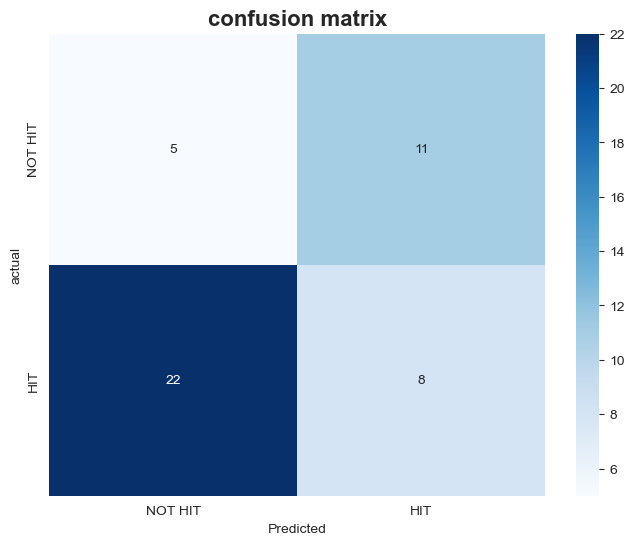

In [18]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues',
           xticklabels =['NOT HIT','HIT'],
           yticklabels = ['NOT HIT','HIT']
            )
plt.title("confusion matrix", fontsize =16 ,fontweight='bold')
plt.ylabel('actual')
plt.xlabel('Predicted')

print("\n Understanding the matrix:")
print("Diagonal =Correct predections")
print("off-diagonal =mistakes")


 Top 5 most Important Features:
              feature  importance
4        Acousticness    0.299896
12      organic_sound    0.195735
10  dance_floor_score    0.111819
8               Tempo    0.075325
2            Loudness    0.060737


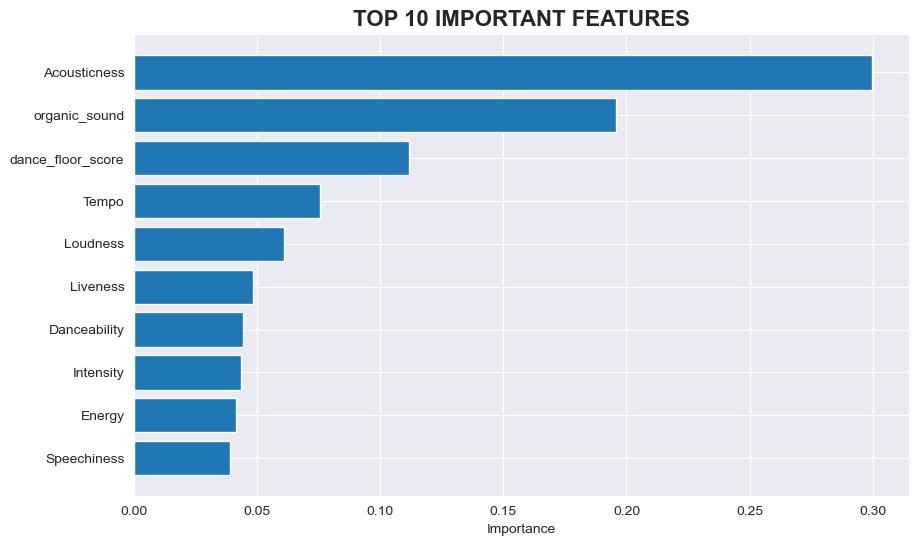

In [19]:
# Feature importance
# which features matter most?
feature_importance = pd.DataFrame({
    'feature' : features,
    'importance': model.feature_importances_
}).sort_values('importance',ascending=False)

print("\n Top 5 most Important Features:")
print(feature_importance.head())

#visualize
plt.figure(figsize=(10,6))
plt.barh(feature_importance['feature'][:10],feature_importance['importance'][:10])
plt.xlabel('Importance')
plt.title('TOP 10 IMPORTANT FEATURES',fontsize=16,fontweight='bold')
plt.gca().invert_yaxis()# To have the most important feature on top
plt.show()

In [20]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

@st.cache_resource
def load_model():
    data = joblib.load("music_predictor.pkl")
    return data["model"], data["scaler"]

model, scaler = load_model()

# Load model and scaler at the start
model, scaler = load_model()  # ← Added: need to load before using

# Define features list
features = [
    'Danceability', 'Energy', 'Loudness', 'Speechiness', 
    'Acousticness', 'Instrumentalness', 'Liveness', 
    'Valence', 'Tempo', 'Intensity', 'dance_floor_score', 
    'mood_score', 'organic_sound'
]  

#create a function to predict any song
def predict_song_popularity(song_features):
    """
    Predict if a song will be a HIT OR NOT HIT
    song_features:dict with feature values
    """
    # create Dataframe with features
    song_df = pd.DataFrame([song_features])
    
    #add engineered features
    song_df['Intensity'] = song_df['Energy']*(song_df['Loudness']+60)/60
    song_df['dance_floor_score'] = song_df['Danceability'] * (song_df['Tempo']/120)
    song_df['mood_score']= song_df['Valence'] * (song_df['Mode']+1)
    song_df['organic_sound'] = (song_df['Acousticness'] + song_df['Instrumentalness'])/2
    
    #select and scale features
    song_features_scaled = scaler.transform(song_df[features])
    
    #predict
    prediction = model.predict(song_features_scaled)[0]
    probabilities = model.predict_proba(song_features_scaled)[0]
    
    return prediction , probabilities

#main App
st.title("🎵 Music Hit Predictor")
col1, col2 = st.columns(2)

with col1:
    danceability = st.slider("Danceability", 0.0, 1.0, 0.7)
    energy = st.slider("Energy", 0.0, 1.0, 0.7)
    loudness = st.slider("Loudness", -60.0, 0.0, -5.0)
    tempo = st.slider("Tempo", 60.0, 200.0, 120.0)
    valence = st.slider("Valence", 0.0, 1.0, 0.5)

with col2:
    speechiness = st.slider("Speechiness", 0.0, 1.0, 0.05)
    acousticness = st.slider("Acousticness", 0.0, 1.0, 0.2)
    instrumentalness = st.slider("Instrumentalness", 0.0, 1.0, 0.0)
    liveness = st.slider("Liveness", 0.0, 1.0, 0.15)
    mode = st.selectbox("Mode", [0, 1])

song = {'Danceability': danceability, 'Energy': energy, 'Loudness': loudness,
        'Speechiness': speechiness, 'Acousticness': acousticness, 
        'Instrumentalness': instrumentalness, 'Liveness': liveness,
        'Valence': valence, 'Tempo': tempo, 'Mode': mode}

if st.button("🎯 Predict"):
    prediction, probs = predict_song_popularity(song)
    
    if prediction == "HIT":
        st.success(f"🎉 {prediction}!")
        st.balloons()
    else:
        st.error(f"📉 {prediction}")
    
    st.write(f"**Confidence:** {probs[0]:.1%}")
    st.progress(probs[0])

Overwriting app.py


In [ ]:
!streamlit run app.py

In [ ]:
# Example: Predict a new upbeat dance track
new_song = {
    'Danceability': 0.85,
    'Energy': 0.90,
    'Loudness': -4.5,
    'Speechiness': 0.05,
    'Acousticness': 0.01,
    'Instrumentalness': 0.00,
    'Liveness': 0.15,
    'Valence': 0.80,
    'Tempo': 128,
    'Mode': 1
}

prediction, probs = predict_song_popularity(new_song)

print("🎵 New Song Analysis:")
print(f"Prediction: {prediction} 🎯")
print(f"\nConfidence Levels:")
print(f"  HIT: {probs[0]:.1%}")
print(f" NOT  HIT: {probs[1]:.1%}")


In [ ]:
# Example: Predict a new upbeat dance track
new_song = {
    'Danceability': 0.89,
    'Energy': 0.47,
    'Loudness': -7.001,
    'Speechiness': 0.0077,
    'Acousticness': 0.0107,
    'Instrumentalness': 0.00,
    'Liveness': 0.14,
    'Valence': 0.214,
    'Tempo': 101,
    'Mode': 1
}

prediction, probs = predict_song_popularity(new_song)

print("🎵 New Song Analysis:")
print(f"Prediction: {prediction} 🎯")
print(f"\nConfidence Levels:")
print(f"  HIT: {probs[0]:.1%}")
print(f" NOT HIT: {probs[1]:.1%}")


In [ ]:
# Example: Predict a new upbeat dance track
new_song = {
    'Danceability': 0.28,    # low → hard to dance to
    'Energy': 0.5,           # moderate → not energetic enough
    'Loudness': -6.5,        # quieter track
    'Speechiness': 0.03,     # not rap/speech-heavy
    'Acousticness': 0.65,    # very acoustic → less mainstream
    'Instrumentalness': 0.1, # some instrumental → less catchy vocals
    'Liveness': 0.3,         # normal
    'Valence': 0.25,         # low → sad or gloomy mood
    'Tempo': 95,             # slower → less club/playable
    'Mode': 0     
}

prediction, probs = predict_song_popularity(new_song)

print("🎵 New Song Analysis:")
print(f"Prediction: {prediction} 🎯")
print(f"\nConfidence Levels:")
print(f"  HIT: {probs[0]:.1%}")
print(f" NOT HIT: {probs[1]:.1%}")


In [ ]:
# Example: Predict a new upbeat dance track
new_song = {
    'Danceability': 0.2,
    'Energy': 0.25,
    'Loudness': -10.0,
    'Speechiness': 0.05,
    'Acousticness': 0.7,
    'Instrumentalness': 0.15,
    'Liveness': 0.3,
    'Valence': 0.15,
    'Tempo': 80,
    'Mode': 0    
}

prediction, probs = predict_song_popularity(new_song)

print("🎵 New Song Analysis:")
print(f"Prediction: {prediction} 🎯")
print(f"\nConfidence Levels:")
print(f"  HIT: {probs[0]:.1%}")
print(f" NOT HIT: {probs[1]:.1%}")


In [ ]:
# Example: Predict a new upbeat dance track
new_song = {
     'Danceability': 0.4,
        'Energy': 0.5,
        'Loudness': -5.8,
        'Speechiness': 0.04,
        'Acousticness': 0.55,
        'Instrumentalness': 0.15,
        'Liveness': 0.3,
        'Valence': 0.25,
        'Tempo': 110,
        'Mode': 0 
}

prediction, probs = predict_song_popularity(new_song)

print("🎵 New Song Analysis:")
print(f"Prediction: {prediction} 🎯")
print(f"\nConfidence Levels:")
print(f"  HIT: {probs[0]:.1%}")
print(f" NOT HIT: {probs[1]:.1%}")
